In [75]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import json

import nltk
import requests

%matplotlib inline

In [76]:
payload = {
    'text': 'I love this phone and I will buy a new one too. It is the best screen I have ever seen.'
}

In [77]:
r = requests.post('http://oxygen.engine.kdm.wcss.pl:5000/api/rst/parse', json=payload)

In [78]:
r.json()['tree']

'(Summary[N][S]\n  (Joint[N][N]\n    _!I love this phone!_\n    _!and I will buy a new one too . oo.!_)\n  (Elaboration[N][S]\n    _!It is the best screen!_\n    _!I have ever seen . en.!_))'

In [79]:
from aspects.utilities.settings import DISCOURSE_TREE_LEAF_PATTERN

In [99]:
tree = nltk.Tree.fromstring(
    r.json()['tree'], leaf_pattern=r'(?<=_!).*(?=!_)')

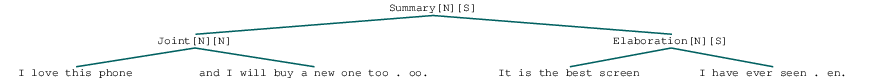

In [100]:
tree

In [36]:
print(tree.label())
for i in tree:
    print(i.label())

Summary[N][S]
Joint[N][N]
Elaboration[N][S]


In [33]:
tree.label()

'Summary[N][S]'

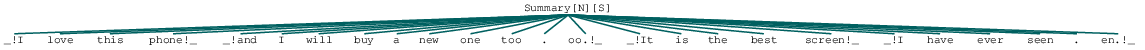

In [39]:
tree.flatten()

In [49]:
tree.leaf_treeposition(2)

(0, 2)

In [44]:
tree.__setitem__(tree.leaf_treeposition(0), ' '.join(['a', 'b']))

In [69]:
edus_strings = [s.strip().replace('__!__', '') for s in ' '.join(tree.flatten()).split('__!__') if s]
edus_strings

['I love this phone',
 'and I will buy a new one too . oo.',
 'It is the best screen',
 'I have ever seen . en.']

In [70]:
for i in range(len(edus_strings)):
    tree.__setitem__(tree.leaf_treeposition(i), edus_strings[i])
    # pt.__setitem__(pt.leaf_treeposition(i), ' '.join(doc.edus[i]))

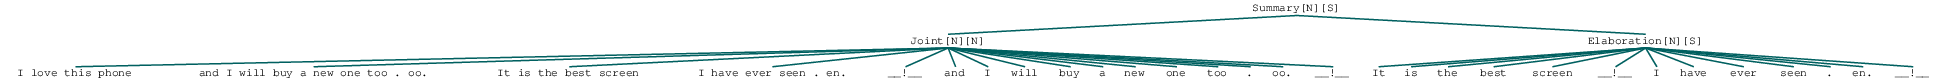

In [71]:
tree

In [42]:
tree.collapse_unary

<bound method Tree.collapse_unary of Tree('Summary[N][S]', [Tree('Joint[N][N]', ['_!I', 'love', 'this', 'phone!_', '_!and', 'I', 'will', 'buy', 'a', 'new', 'one', 'too', '.', 'oo.!_']), Tree('Elaboration[N][S]', ['_!It', 'is', 'the', 'best', 'screen!_', '_!I', 'have', 'ever', 'seen', '.', 'en.!_'])])>